# Under Progress
---

In [243]:
from matplotlib import pyplot as plt
from PIL import Image
import cv2 as cv
import numpy as np
import imutils
import copy
import time

In [244]:
#Utils
def cvtBinaryAndResize(path, size):
    image = cv.imread(path, cv.IMREAD_GRAYSCALE)
    resized = imutils.resize(image, width=size)
    resized = resized.tolist()

    row, col = len(resized), len(resized[0])
    for i in range(row):
        for j in range(col):
            if(resized[i][j]!=255):
                resized[i][j] = 0
            else:
                resized[i][j] = 1
    
    return resized

def invertImage(data):
    row, col = len(data), len(data[0])
    for i in range(row):
        for j in range(col):
            data[i][j] = int(not data[i][j])
    return data

def invertArray(arr):
    temp = copy.deepcopy(arr)
    for i in range(len(temp)):
        temp[i] = int(not temp[i])
    return temp

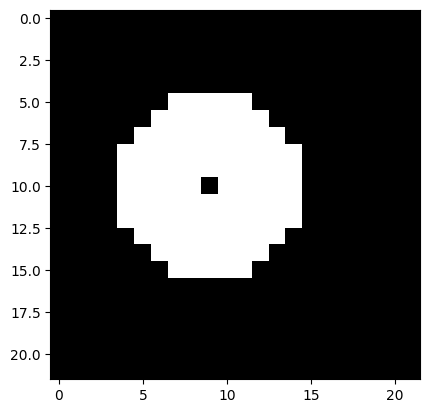

In [245]:
#Data prep
data = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
		[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]] # Approximately a donut

# data = [[0, 0, 0, 0, 0],
# 		[0, 0, 1, 0, 0],
# 		[0, 1, 1, 1, 0],
# 		[0, 0, 1, 0, 0],
# 		[0, 0, 0, 0, 0]]

# data = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
# 		[1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
# 		[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
# 		[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

data = invertImage(data)


image = Image.new('1', (len(data),len(data[0])))
pixels = image.load()

for i in range(image.size[0]):
    for j in range(image.size[1]):
       pixels[j, i] = data[i][j]

image.save("data/bin0.bmp")
plt.imshow(data, cmap="gray")

#Resizing
# image = cv.imread('data/bin0.bmp', cv.IMREAD_GRAYSCALE)
# resized = imutils.resize(image, width=256)
# resized = resized.tolist()

# row, col = len(resized), len(resized[0])
# for i in range(row):
#     for j in range(col):
#         if(resized[i][j]!=255):
#             resized[i][j] = 0
#         else:
#             resized[i][j] = 1

#Padding
resized = cv.imread('data/bin0.bmp', cv.IMREAD_GRAYSCALE).tolist()
row, col = len(resized), len(resized[0])

for i in range(row):
    padding = [0]
    resized[i] = [0] + resized[i] + [0] 


padding = [0 for _ in range(col+2)]
resized.insert(0, padding)
resized.append(padding)

image = Image.new('1', (row,col))
pixels = image.load()

for i in range(image.size[0]):
    for j in range(image.size[1]):
       pixels[j, i] = resized[i][j]

image.save("data/bin0.bmp")
plt.imshow(resized, cmap="gray")

In [252]:
# #calculating euler differential
def bodies(neighbourhood, centre):
    if centre==1: return 1
    bodies = 0

    index = np.argmax(neighbourhood)
    if neighbourhood[index] == 0: 
        return bodies

    index2 = (index+3)%6
    #Case 1: There's something across
    if neighbourhood[index2] == 1:
        if (neighbourhood[(index+1)%6] == 1 and neighbourhood[(index+2)%6] == 1 
            or neighbourhood[(index2+1)%6] == 1 and neighbourhood[(index2+2)%6] == 1) :
            bodies = 1
        else:
            bodies = 2
    else:
        #Case 2: There's nothing accross
        if(neighbourhood[(index)%6] == 1 and neighbourhood[(index+2)%6] == 1 and neighbourhood[(index+4)%6] == 1):
            bodies = 3
        elif(neighbourhood[(index+1)%6] == 0 and neighbourhood[(index+2)%6] == 1 
            or neighbourhood[(index2+1)%6] == 1 and neighbourhood[(index2+2)%6] == 0):
            bodies = 2
        else:
            bodies = 1

    return bodies

def holes(neighbourhood, centre):
    if(centre == 1):
        return 0
    
    if sum(neighbourhood) == 6:
        return 1
    
    return 0

def E(neighbourhood, centre):
    # print(bodies(neighbourhood, centre) , holes(neighbourhood, centre))
    return bodies(neighbourhood, centre) - holes(neighbourhood, centre)

def E_star(neighbourhood):
    E1 = E(neighbourhood, centre = 0)
    E2 = E(neighbourhood, centre = 1)

    # print(E2, E1)

    return E2-E1

neighbourhood = [0, 1, 0, 1, 0, 1]
E_star(neighbourhood)

-2

In [247]:
# def E_star(neighbourhood):
#     s = sum(neighbourhood)
#     if(s==0 or s==6):
#         return 1
    
#     flag1, flag0 = True, True

#     index = np.argmax(neighbourhood)
#     count=1
#     i = (index + 1)%6
#     while i != index:
#         if(neighbourhood[i]==1):
#             count+=1
#         else:
#             break

#         i = (i + 1)%6
    
#     if(count!=s):
#         flag1 = False
    
#     index = np.argmin(neighbourhood)
#     count=1
#     i = (index + 1)%6
#     while i != index:
#         if(neighbourhood[i]==0):
#             count+=1
#         else:
#             break

#         i = (i + 1)%6
    
#     if(count!= 6 - s):
#         flag0 = False

#     return not (flag1 or flag0)

# E_star((1,1,1,1,1,1)) == 0

In [248]:
# resized = plt.imread("data/tree.bmp")
# resized = cv.cvtColor(resized, cv.COLOR_RGB2GRAY).tolist()

# row, col = len(resized), len(resized[0])
# print(row, col)

# for i in range(row):
#     resized[i] = [0] + resized[i] + [0] 


# padding = [0 for _ in range(col+2)]
# resized.insert(0, padding)
# resized.append(padding)

# row, col = len(resized), len(resized[0])
# print(row, col)

# for i in range(len(resized)):
#     for j in range(len(resized[0])):
#         resized[i][j] = int(resized[i][j]==255)

# plt.imshow(resized, cmap="gray")

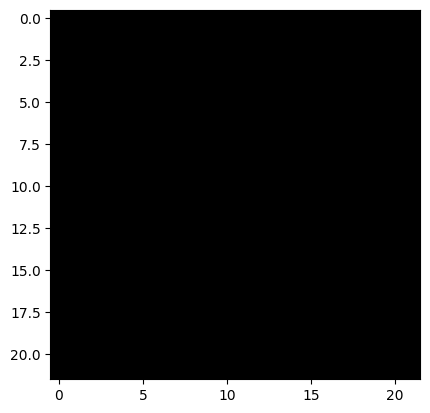

In [249]:
#Algorithm 4 with N0
# aij = if (i,j)'s neighbourhood is in N0 i.e. E_star(neighbourhood) == 0
# bij = current value of (i, j)
# cij = new value of (i, j)

'''
Algorithm 4
aij bij cij
0   0   0   
0   1   1
1   0   0
1   1   0
'''
size = 20

modified = [(-1,-1)]
count=0
while(len(modified)!=0):
    modified = []
    for i in range(1, 20+1):
        for j in range(1, 20+1):
            neighbourhood = (resized[i][j-1], resized[i-1][j-1], resized[i-1][j], resized[i][j+1], resized[i+1][j+1], resized[i+1][j])
            # if ((i, j-1) in modified
            #     or (i-1, j-1) in modified
            #     or (i-1, j) in modified
            #     or (i, j+1) in modified
            #     or (i+1, j+1) in modified
            #     or (i+1, j) in modified): continue


            aij = int(E_star(neighbourhood) == 0)
            bij = resized[i][j]

            match (aij, bij):
                case (0,0):
                    cij = 0
                case (0,1):
                    cij = 1
                case (1,0):
                    cij = 0
                case (1,1):
                    cij = 0
            
            # print((i,j),neighbourhood,aij,bij, cij)

            if(cij!=bij):
            #     # print((i,j)
            #     #     ,(i, j-1)
            #     #     ,(i-1, j-1)
            #     #     ,(i-1, j)
            #     #     ,(i, j+1) 
            #     #     ,(i+1, j+1)
            #     #     ,(i+1, j)
            #     #     , (i,j) in modified )
                modified.append((i,j))
            #     modified.append((i,j-1))
            #     modified.append((i-1,j-1))
            #     modified.append((i,j+1))
            #     modified.append((i+1,j+1))
            #     modified.append((i+1,j))
            
            resized[i][j] = cij
    count+=1
plt.imshow(resized, cmap="gray")
plt.show()

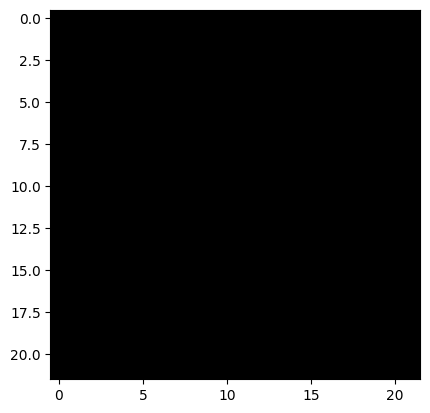

In [250]:
image = Image.new('1', (len(resized[0]),len(resized)))
pixels = image.load()

for i in range(len(resized)):
    for j in range(len(resized[0])):
       pixels[j, i] = resized[i][j]

image.save("data/out0.bmp")
plt.imshow(resized, cmap="gray")

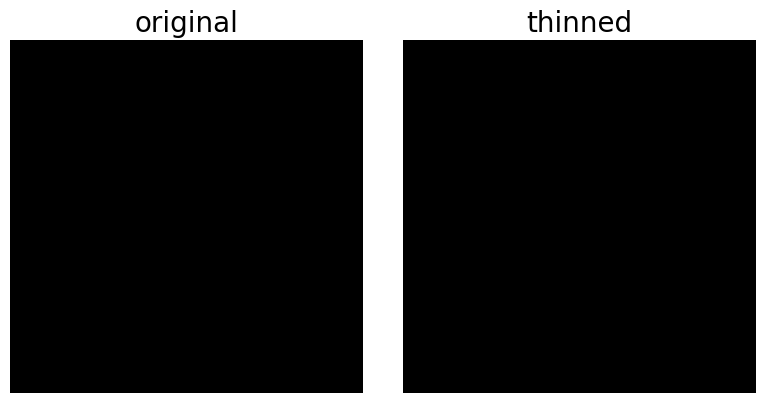

In [251]:
from skimage.morphology import skeletonize, thin
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
# image = invert(data.horse())
image = np.array(resized)

# perform skeletonization
skeleton = skeletonize(image)
thinned = thin(skeleton)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(thinned, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('thinned', fontsize=20)

fig.tight_layout()
plt.show()